In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-08-24 13:51:35,211] Making new env: FrozenLake-v0


In [3]:
print(np.argmax(allQ,1))

NameError: name 'allQ' is not defined

In [4]:
tf.reset_default_graph()

In [5]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [6]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            print(allQ)
            print(a)
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            print(r)
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str((sum(rList)/num_episodes)*100) + "%")

[[ 0.00289685  0.0079557   0.00061885  0.00512431]]
[1]
0.0
[[ 0.00793429  0.00339019  0.00107818  0.00952718]]
[3]
0.0
[[ 0.00793429  0.00339019  0.00107818  0.00950813]]
[3]
0.0
[[ 0.00793429  0.00339019  0.00107818  0.00948911]]
[3]
0.0
[[ 0.00289685  0.00825094  0.00061885  0.00512431]]
[1]
0.0
[[ 0.00798112  0.00339019  0.00107818  0.00948911]]
[3]
0.0
[[ 0.0059783   0.00854061  0.00096596  0.00208888]]
[1]
0.0
[[ 0.00834171  0.00151725  0.00758393  0.00406413]]
[0]
0.0
[[ 0.00289685  0.00847959  0.00061885  0.00512431]]
[1]
0.0
[[ 0.0017066   0.00568099  0.00076259  0.00090333]]
[1]
0.0
[[ 0.00289685  0.00790851  0.00061885  0.00512431]]
[1]
0.0
[[ 0.0017066   0.00568099  0.00076259  0.00228855]]
[1]
0.0
[[ 0.00599467  0.00577132  0.00290661  0.00840053]]
[3]
0.0
[[ 0.00599467  0.00577132  0.00290661  0.00838373]]
[3]
0.0
[[ 0.00599467  0.00577132  0.00290661  0.00836696]]
[3]
0.0
[[ 0.00956679  0.00803639  0.00746276  0.00859401]]
[0]
0.0
[[ 0.00289685  0.00745164  0.00061885  0

[[ 0.00396646  0.00831152  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00396646  0.0082949   0.00061885  0.00576737]]
[1]
0.0
[[ 0.00396646  0.00827831  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00498863  0.00875601  0.00076259  0.00333656]]
[1]
0.0
[[ 0.00396646  0.00835633  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00862824  0.00460534  0.00244281  0.00793158]]
[0]
0.0
[[ 0.00396646  0.00839346  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00396646  0.00837667  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00856449  0.00460534  0.00244281  0.00793158]]
[0]
0.0
[[ 0.00396646  0.00839711  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00498863  0.00875601  0.00250325  0.00333656]]
[1]
0.0
[[ 0.00620933  0.00577132  0.00418728  0.00851272]]
[3]
0.0
[[ 0.00498863  0.00869032  0.00250325  0.00333656]]
[1]
0.0
[[ 0.00620933  0.00577132  0.00418728  0.00853086]]
[3]
0.0
[[ 0.00920969  0.00803639  0.00746276  0.00859401]]
[0]
0.0
[[ 0.00396646  0.00845137  0.00061885  0.00576737]]
[1]
0.0
[[ 0.00498863  0.00869032  0.00369171  0

[1]
0.0
[[ 0.00577497  0.00885109  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00886979  0.00584767  0.00244281  0.00793158]]
[0]
0.0
[[ 0.00577497  0.00883709  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00884557  0.00584767  0.00244281  0.00793158]]
[0]
0.0
[[ 0.00577497  0.00882109  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00498863  0.00910137  0.0046517   0.00442177]]
[1]
0.0
[[ 0.00671079  0.00642363  0.00418728  0.00890035]]
[3]
0.0
[[ 0.00929092  0.00803639  0.00746276  0.00859401]]
[0]
0.0
[[ 0.00552508  0.00377718  0.00417027  0.00762111]]
[3]
0.0
[[ 0.00831857  0.00151725  0.00758393  0.00406413]]
[0]
0.0
[[ 0.00577497  0.00885895  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00577497  0.00884123  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00498863  0.00904336  0.0046517   0.00442177]]
[1]
0.0
[[ 0.00577497  0.00886357  0.00061885  0.00632382]]
[1]
0.0
[[ 0.00498863  0.00912787  0.0046517   0.00442177]]
[1]
0.0
[[ 0.00498863  0.00910962  0.0046517   0.00442177]]
[1]
0.0
[[ 0.00577497  0.00889817  0.000

0.0
[[ 0.00577497  0.00905426  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00577497  0.00903615  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00920471  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.00577497  0.00905145  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00925695  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.00577497  0.00907404  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00920222  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.00577497  0.00908127  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00577497  0.00906311  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00606627  0.00924638  0.00561454  0.00543059]]
[1]
0.0
[[ 0.00673244  0.00642363  0.00515243  0.013478  ]]
[3]
0.0
[[ 0.00673244  0.00642363  0.00515243  0.01345104]]
[3]
0.0
[[ 0.02792483  0.00793809  0.00746276  0.00859401]]
[0]
0.0
[[ 0.00577497  0.00908127  0.00061885  0.00685314]]
[1]
0.0
[[ 0.00606627  0.01006575  0.00561454  0.00543059]]
[1]
0.0
[[ 0.00606627  0.01004562  0.00561454  0.00543059]]
[1]
0.0
[[ 0.00577497  0.00925803  0.0006188

[[ 0.01108847  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.01106629  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.01104416  0.00584767  0.00244281  0.00776584]]
[0]
0.0
[[ 0.01104416  0.00584767  0.00414099  0.00776584]]
[0]
0.0
[[ 0.00577497  0.01375215  0.0023426   0.00788026]]
[1]
0.0
[[ 0.01072851  0.00584767  0.00414099  0.00776584]]
[0]
0.0
[[ 0.01070705  0.00584767  0.00414099  0.00776584]]
[0]
0.0
[[ 0.00577497  0.01312596  0.0023426   0.00788026]]
[1]
0.0
[[ 0.01116458  0.00584767  0.00414099  0.00776584]]
[0]
0.0
[[ 0.00577497  0.01271136  0.0023426   0.00788026]]
[1]
0.0
[[ 0.00808124  0.02494051  0.00561454  0.00945259]]
[1]
0.0
[[ 0.00577497  0.01510731  0.0023426   0.00788026]]
[1]
0.0
[[ 0.00808124  0.02184559  0.00561454  0.00945259]]
[1]
0.0
[[ 0.00808124  0.02180189  0.00561454  0.00945259]]
[1]
0.0
[[ 0.00577497  0.01641127  0.0023426   0.00788026]]
[1]
0.0
[[ 0.00577497  0.01637845  0.0023426   0.00788026]]
[1]
0.0
[[ 0.00577497  0.01634569  0.0023426   0

[[ 0.01536566  0.02135594  0.00561454  0.01197767]]
[1]
0.0
[[ 0.00673244  0.01259525  0.00515243  0.03166455]]
[3]
0.0
[[ 0.00673244  0.01259525  0.00515243  0.03160122]]
[3]
0.0
[[ 0.01536566  0.02335433  0.00561454  0.01197767]]
[1]
0.0
[[ 0.01536566  0.02330763  0.00561454  0.01197767]]
[1]
0.0
[[ 0.00673244  0.01259525  0.00515243  0.02990513]]
[3]
0.0
[[ 0.01536566  0.02456732  0.00561454  0.01197767]]
[1]
0.0
[[ 0.01536566  0.02451818  0.00561454  0.01197767]]
[1]
0.0
[[ 0.0091249   0.01639677  0.0023426   0.00932873]]
[1]
0.0
[[ 0.0091249   0.01636398  0.0023426   0.00932873]]
[1]
0.0
[[ 0.0091249   0.01633125  0.0023426   0.00932873]]
[1]
0.0
[[ 0.0091249   0.01629858  0.0023426   0.00932873]]
[1]
0.0
[[ 0.01553909  0.02451818  0.00561454  0.01197767]]
[1]
0.0
[[ 0.00673244  0.01259525  0.00898627  0.02990513]]
[3]
0.0
[[ 0.01130717  0.01259525  0.00898627  0.02990513]]
[3]
0.0
[[ 0.05175785  0.00793809  0.00746276  0.00859401]]
[0]
0.0
[[ 0.00846072  0.09399032  0.0027685   0

KeyboardInterrupt: 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

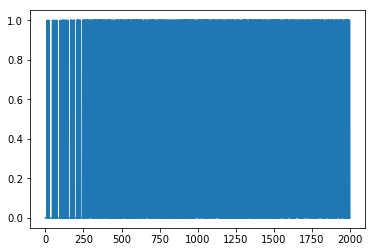

In [8]:
print(rList)
plt.plot(rList)

In [11]:
print(rAll)

0.0


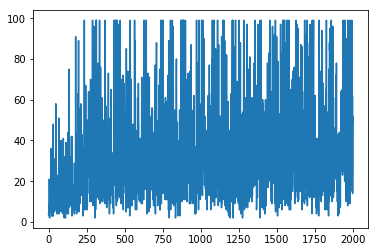

In [7]:
plt.plot(jList)